In [57]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os 

In [58]:
x_smiley = np.load('smiley_X.npy')
y_smiley = np.load('smiley_Y.npy')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    x_smiley, y_smiley, random_state=None)

In [60]:
class_names = ['Smiling', 'Sad']

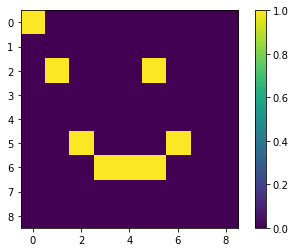

In [61]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [62]:
print(y_train[0])

0.0


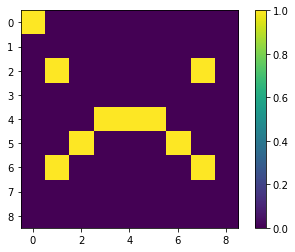

In [63]:
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)

In [64]:
X_train  = X_train / 255.0
X_test = X_test / 255.0

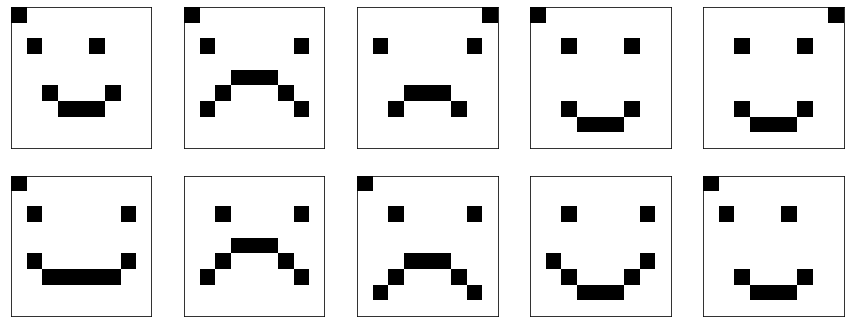

In [65]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[y_train[i]])
plt.show()

In [75]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(3, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(2, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 2)         56        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 2)          0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [78]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

ValueError: in user code:

    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Applications/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 9, 9, 1)


In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
nn_clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)

ValueError: Found array with dim 4. Estimator expected <= 2.

In [85]:
#precision, Recall, F score, support
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [86]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)

NameError: name 'y_pred' is not defined